# Synthetic Data Generation and UMAP Visualization
In this notebook, we will create a synthetic dataset representing cell measurements from microscopy images and apply UMAP for dimensionality reduction. We will visualize the UMAP results using seaborn.

## Import libraries
First, we need to import the necessary Python libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
import umap
import matplotlib.pyplot as plt

## Generate synthetic data
We will create a synthetic dataset with four features: intensity, aspect ratio, perimeter, and elongation.

In [2]:
# Generate random data using make_blobs for simplicity
data, _ = make_blobs(n_samples=300, centers=4, n_features=4, cluster_std=1.5, random_state=42)

# Create a DataFrame
df = pd.DataFrame(data, columns=['intensity', 'aspect_ratio', 'perimeter', 'elongation'])

# Display the first few rows of the dataframe
df.head()

,intensity,aspect_ratio,perimeter,elongation
0,2.308949,4.231106,-11.628094,10.517577
1,6.278087,-6.776194,-7.865931,-6.753560
2,1.370556,3.697693,-9.255109,8.680074
3,-2.188057,7.145678,4.899650,2.551146
4,4.109418,-5.900727,-7.846387,-7.987294


## Apply UMAP
Now, we apply UMAP to reduce the dimensionality of our dataset to two dimensions.

In [3]:
# Initialize UMAP model
umap_model = umap.UMAP(random_state=42)

# Fit and transform the data
umap_data = umap_model.fit_transform(df)

# Add UMAP coordinates to the dataframe
df['UMAP_1'] = umap_data[:, 0]
df['UMAP_2'] = umap_data[:, 1]

# Display the first few rows of the updated dataframe
df.head()

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,intensity,aspect_ratio,perimeter,elongation,UMAP_1,UMAP_2
0,2.308949,4.231106,-11.628094,10.517577,21.461021,1.292411
1,6.278087,-6.776194,-7.865931,-6.753560,6.737937,10.965380
2,1.370556,3.697693,-9.255109,8.680074,21.762495,2.253670
3,-2.188057,7.145678,4.899650,2.551146,-3.349722,4.406935
4,4.109418,-5.900727,-7.846387,-7.987294,6.172788,10.813880


## Visualize the UMAP result
Finally, we will create a scatterplot of the UMAP results and save it as a PNG file.

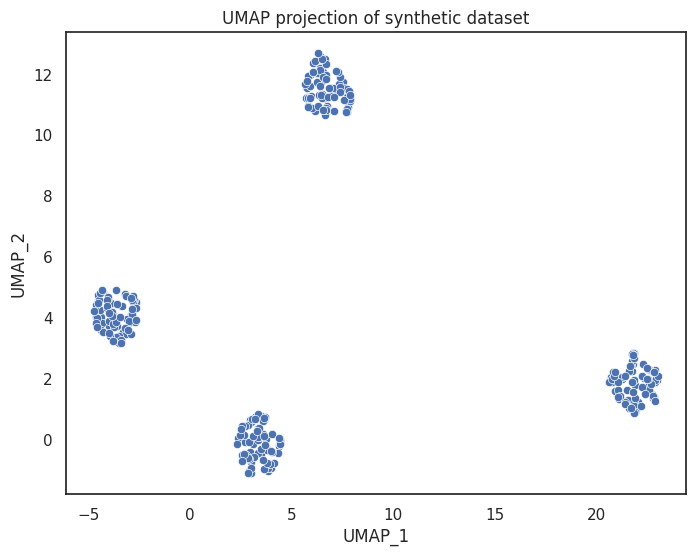

In [4]:
# Set the aesthetic style of the plots
sns.set(style='white', context='notebook')

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP_1', y='UMAP_2', data=df)
plt.title('UMAP projection of synthetic dataset')

# Save the plot as PNG file
plt.savefig('umap_synthetic_data.png')

# Show the plot
plt.show()